# Calcul de alpha


In [46]:
import numpy as np
L = 50
W = 54
w = 54
T = 3
B = 5.7
h = 4.5
Ac = h*W
Ab = B*T
Hm = Ac/W
m = Ab/Ac
p = (W-w)/2/h

Ks = (90, 40, 30, 25, 20, 10)
Ksb = 100
Aw = Ac-Ab

Rhc = Aw/(2*h+W)
Rhb = Aw/( B+2*T )
# Dh = Rhc*4


alpha_s = []
for K_sc in Ks:
    alpha_s += [( 1 + L/(K_sc**2*Rhc**(4/3)) + L/(Ksb**2*Rhb**(4/3)) )]

print (alpha_s)

[1.0000965301198577, 1.0000965301198577, 1.0000965301198577, 1.0000965301198577, 1.0000965301198577, 1.0000965301198577]


# Calcul des limites de Schijf 

In [41]:
Fs = ( 2*np.sin(np.arcsin(1-m)/(3*np.sqrt(alpha_s))) )**1.5
F0 = ( 2*np.sin(np.arcsin(1-m)/3) )**1.5

print (100*(F0 - Fs)/F0)

[0.08662427 0.40917658 0.71950008 1.02933549 1.5938699  6.02282339]


# On trace courant de retour et abaissement du plan d'eau

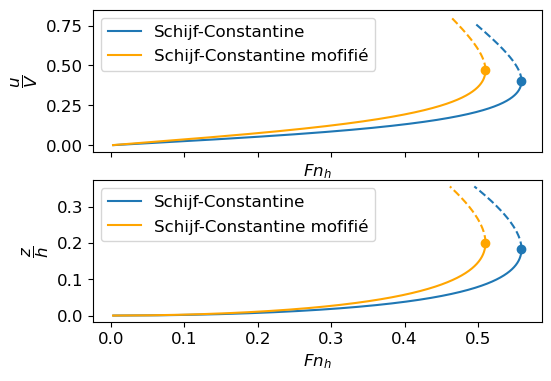

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import json
from config import large_figure_width, standard_figure_width


      
W = 54
w = 54
T = 3
B = 11.2
h = 4.5
Ac = h*W
Ab = B*T
Hm = Ac/W
m = Ab/Ac
p = (W-w)/2/h
g = 9.81

alpha = 1.0002

m = Ab/Ac

z = np.linspace(1e-5, 1.6, 1000)

z = z/Hm


Fc = np.sqrt( ( 2*z*(1-z-m)**2 )/( 1-(1-z-m)**2 ) )

Fca = np.sqrt( ( 2*z*alpha*(1-z-m)**2 )/( 1-alpha*(1-z-m)**2 ) )


V = Fc*np.sqrt(g * Hm)
Va = Fca*np.sqrt(g * Hm)
uc = -1 + np.sqrt( 1 + 2*g*z/V )
uca = -1 + np.sqrt( 1 + 2*g*z/Va )
# uc = -Fc + np.sqrt( Fc**2 + 2*z )  
# uca = -Fca + np.sqrt( Fca**2 + 2*z )  


max_index = np.argmax(Fc)
Fc_max = Fc[max_index]
z_max = z[max_index]
uc_max = uc[max_index]

max_index_a = np.argmax(Fca)
Fca_max = Fca[max_index_a]
za_max = z[max_index_a]
uca_max = uca[max_index_a]



large_figure_height = 0.7 * large_figure_width
fig_size = (large_figure_width, large_figure_height)

# Créer une grille de sous-graphiques avec une rangée et deux colonnes
fig, axes = plt.subplots(2, 1, figsize=fig_size, sharex=True)
ax1 = axes[1]
ax2 = axes[0]


# plt.plot( Fsc**2, z, label='Schijf' )
# plt.plot( Fsf**2, z, label='Sharp & Fenton simplifié' )
# plt.xlabel( r'Fn$^2$' )
# plt.ylabel( r'$\dfrac{z}{H_m}$' )


# ax1.plot( Fc, z, label='Schijf-Constantine' )
# ax1.plot( Fc_max, z_max, 'o', color = 'tab:blue' )
# ax1.plot( Fca, z, label='Schijf-Constantine mofifié', color = 'orange' )
# ax1.plot( Fca_max, za_max, 'o', color = 'orange' )


ax1.plot( Fc[:max_index + 1], z[:max_index + 1], label='Schijf-Constantine' )
ax1.plot( Fc_max, z_max, 'o', color = 'tab:blue' )
ax1.plot(Fc[max_index:], z[max_index:], '--', color = 'tab:blue' )
ax1.plot( Fca[:max_index_a + 1], z[:max_index_a + 1], label='Schijf-Constantine mofifié', color = 'orange' )
ax1.plot( Fca_max, za_max, 'o', color = 'orange' )
ax1.plot( Fca[max_index_a:], z[max_index_a:], '--', color = 'orange' )



ax1.set_xlabel( r'$Fn_h$' )
ax1.set_ylabel(r'$\dfrac{z}{h}$')
ax1.legend()



ax2.plot( Fc[:max_index + 1], uc[:max_index + 1], label='Schijf-Constantine' )
ax2.plot( Fc_max, uc_max, 'o', color = 'tab:blue' )
ax2.plot(Fc[max_index:], uc[max_index:], '--', color = 'tab:blue' )
ax2.plot( Fca[:max_index_a + 1], uca[:max_index_a + 1], label='Schijf-Constantine mofifié', color = 'orange' )
ax2.plot( Fca_max, uca_max, 'o', color = 'orange' )
ax2.plot( Fca[max_index_a:], uca[max_index_a:], '--', color = 'orange' )

# ax2.plot( Fc, uc, label='Schijf-Constantine' )
# ax2.plot( Fc_max, uc_max, 'o', color = 'tab:blue' )
# ax2.plot( Fca, uca, label='Schijf-Constantine mofifié', color = 'orange' )
# ax2.plot( Fca_max, uca_max, 'o', color = 'orange' )



ax2.set_xlabel( r'$Fn_h$' )
ax2.set_ylabel(r"$\dfrac{u}{V}$")
ax2.legend()



# plt.savefig( '../figures/alphinfluence.pdf', bbox_inches = 'tight' )
plt.legend()
plt.show()



## avec les pertes aussi sur le canal

In [124]:
import numpy as np
L = 100
W = 54
w = 54
T = 3
B = 11.4
h = 4.5
Ac = h*W
Ab = B*T
Hm = Ac/W
m = Ab/Ac
p = (W-w)/2/h

Ksc = (90, 80, 70, 30, 25, 20, 10 )
Ksb = 80
Aw = Ac-Ab

Rhc = Aw/(2*h+w)
Rhb = Aw/( B+2*T )
# Dh = Rhc*4

beta = L/(Ksb**2*Rhb**(4/3))
gamma_s = []
for Ks in Ksc:

    gamma_s += [( L/(Ks**2*Rhc**(4/3)) )]
    
gamma_s = np.array(gamma_s)    
    
print (r'beta = ', round(beta, 5))

print (np.round(gamma_s,3))

beta =  0.00057
[0.002 0.003 0.004 0.022 0.032 0.051 0.202]


/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_67360/2057991645.py:83: RuntimeWarning: invalid value encountered in arcsin
  y = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))


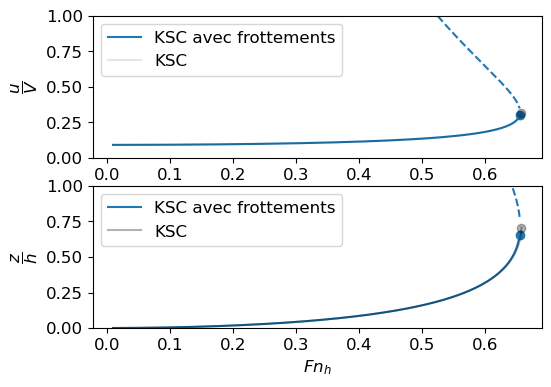

In [130]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np
import json

# Définition des constantes et paramètres de base
g = 9.81  # Accélération due à la gravité

# Dimensions du canal
W = 54  # Largeur totale
w = 54  # Largeur intérieure
T = 3.5   # Tirant d'eau
B = 5.7  # Largeur de base
h = 4.5  # Hauteur
alpha = 1.0006
beta = 0.03
# Calcul des surfaces et autres paramètres géométriques
Ac = h * W  # Surface de la section transversale
Ab = B * T  # Surface de la base
Hm = Ac / W  # Hauteur moyenne
m = Ab / Ac  # Rapport des surfaces
p = (W - w) / (2 * h)  # Pente

# Génération des valeurs de Froude
F_values = np.linspace(0.01, 1, 1000)  # Valeurs de F de 0.01 à 1

# Initialisation des listes pour stocker les solutions u et z correspondantes
u1_values = []
z1_values = []
u2_values = []
z2_values = []

# Boucle sur les différentes valeurs de Froude
for F in F_values:
    # Calcul des coefficients du polynôme cubique
    a = F**2 / 2 *( alpha + beta )
    b = F**2 *( beta +3*alpha/2 )
    c = -1 + m + F**2
    d = F**2/2*(1-alpha) + m
    
    
    # a = F**2 / 2
    # b = 3*F**2 / 2
    # c = F**2 -1 +m
    # d = m
    # Résolution du polynôme cubique
    solutions = np.roots([a, b, c, d])
    
    # Filtrage des solutions réelles et positives
    solution_reels = np.real(solutions[np.imag(solutions) == 0])
    solution = solution_reels[solution_reels > 0]
    
    # Sélection de la solution minimale
    try:
        x1 = min(solution)
        x2 = max(solution)
    except:
        x1 = np.nan
        x2 = np.nan
    
    # Calcul de la vitesse u correspondante
    u1 = float((x1))
    u2 = float((x2))
    u1_values.append(u1)
    u2_values.append(u2)    
    
    # Calcul de la hauteur z correspondante
    
    z1 = float(h*F**2/2*( u1**2+ 2*u1 ))
    z2 = float(h*F**2 / 2 * (u2**2+ 2*u2))
    z1_values.append(z1)    
    z2_values.append(z2)

# Conversion des listes en tableaux numpy pour une manipulation plus facile
u1_values = np.array(u1_values)
z1_values = np.array(z1_values)
u2_values = np.array(u2_values)
z2_values = np.array(z2_values)

# Calcul des solutions analytiques avec les formules de cardan pour comparaison
q1 = 2 / F_values**2
p1 = -(1 + q1 * (1 - m))
y = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))
u = (y - 1)
z = h*F_values**2/2*( u**2+ 2*u )



max_z1 = np.nanmax(z1_values)
max_F = F_values[np.nanargmax(z1_values)]
max_u1 = np.nanmax(u1_values)



large_figure_height = 0.7 * large_figure_width
fig_size = (large_figure_width, large_figure_height)

# Créer une grille de sous-graphiques avec une rangée et deux colonnes
fig, axes = plt.subplots(2, 1, figsize=fig_size)
ax1 = axes[1]
ax2 = axes[0]

# Tracé du premier graphique : rapport de hauteur
ax1.plot(F_values, z1_values, color = 'tab:blue', label = 'KSC avec frottements')
ax1.plot(F_values, z2_values, '--', color = 'tab:blue')
ax1.plot(max_F, max_z1, 'o', color='tab:blue')
ax1.plot(F_values, z,  color = 'black', alpha = 0.3, label = 'KSC')  # Ligne commentée pour la solution analytique
ax1.plot( max(F_values[~np.isnan(u)]), max(z[~np.isnan(u)]), 'o', color = 'black', alpha = 0.3 )# Ligne commentée pour la solution analytique
ax1.legend()
ax1.set_ylim(0, 1)
ax1.set_ylabel(r"$\dfrac{z}{h}$")
ax1.set_xlabel(r'$Fn_h$')

# Tracé du deuxième graphique : rapport de vitesse
ax2.plot(F_values, u1_values, color = 'tab:blue', label = 'KSC avec frottements')
ax2.plot(F_values, u2_values, '--', color = 'tab:blue')
ax2.plot(max_F, max_u1, 'o', color='tab:blue')
ax2.plot(F_values, u, color = 'black', alpha = 0.1, label = 'KSC')  # Ligne commentée pour la solution analytique
ax2.plot( max(F_values[~np.isnan(u)]), max(u[~np.isnan(u)]), 'o', color = 'black', alpha = 0.3 )# Ligne commentée pour la solution analytique
ax2.set_ylabel(r"$\dfrac{u}{V}$")
ax2.set_ylim(0, 1)
ax2.set_xlabel(r'$Fh_h$')
ax2.legend()
# Enregistrement de la figure en tant que fichier PDF
plt.savefig('../figures/cubique-alpha.pdf', bbox_inches = 'tight')

# Affichage de la figure
plt.show()

/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_67360/3890742704.py:86: RuntimeWarning: invalid value encountered in arcsin
  y = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))


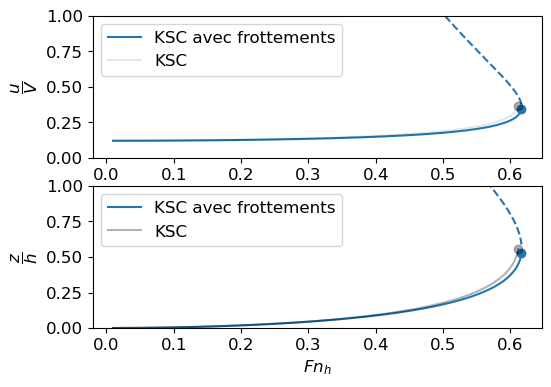

In [129]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np
import json

# Définition des constantes et paramètres de base
g = 9.81  # Accélération due à la gravité

# Dimensions du canal
W = 40  # Largeur totale
w = 30  # Largeur intérieure
T = 2.6   # Tirant d'eau
B = 5.7  # Largeur de base
h = 3.5  # Hauteur



alpha = 1.051  
beta = 0.03
# Calcul des surfaces et autres paramètres géométriques
Ac = h * W  # Surface de la section transversale
Ab = B * T  # Surface de la base
Hm = Ac / W  # Hauteur moyenne
m = Ab / Ac  # Rapport des surfaces
p = (W - w) / (2 * h)  # Pente

# Génération des valeurs de Froude
F_values = np.linspace(0.01, 1, 1000)  # Valeurs de F de 0.01 à 1

# Initialisation des listes pour stocker les solutions u et z correspondantes
u1_values = []
z1_values = []
u2_values = []
z2_values = []

# Boucle sur les différentes valeurs de Froude
for F in F_values:
    # Calcul des coefficients du polynôme cubique
    a = F**2 / 2 *( alpha + beta )
    b = F**2 *( beta +3*alpha/2 )
    c = -1 + m + F**2
    d = F**2/2*(1-alpha) + m
    
    
    # a = F**2 / 2
    # b = 3*F**2 / 2
    # c = F**2 -1 +m
    # d = m
    # Résolution du polynôme cubique
    solutions = np.roots([a, b, c, d])
    
    # Filtrage des solutions réelles et positives
    solution_reels = np.real(solutions[np.imag(solutions) == 0])
    solution = solution_reels[solution_reels > 0]
    
    # Sélection de la solution minimale
    try:
        x1 = min(solution)
        x2 = max(solution)
    except:
        x1 = np.nan
        x2 = np.nan
    
    # Calcul de la vitesse u correspondante
    u1 = float((x1))
    u2 = float((x2))
    u1_values.append(u1)
    u2_values.append(u2)    
    
    # Calcul de la hauteur z correspondante
    
    z1 = float(h*F**2/2*( u1**2+ 2*u1 ))
    z2 = float(h*F**2 / 2 * (u2**2+ 2*u2))
    z1_values.append(z1)    
    z2_values.append(z2)

# Conversion des listes en tableaux numpy pour une manipulation plus facile
u1_values = np.array(u1_values)
z1_values = np.array(z1_values)
u2_values = np.array(u2_values)
z2_values = np.array(z2_values)

# Calcul des solutions analytiques avec les formules de cardan pour comparaison
q1 = 2 / F_values**2
p1 = -(1 + q1 * (1 - m))
y = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))
u = (y - 1)
z = h*F_values**2/2*( u**2+ 2*u )



max_z1 = np.nanmax(z1_values)
max_F = F_values[np.nanargmax(z1_values)]
max_u1 = np.nanmax(u1_values)



large_figure_height = 0.7 * large_figure_width
fig_size = (large_figure_width, large_figure_height)

# Créer une grille de sous-graphiques avec une rangée et deux colonnes
fig, axes = plt.subplots(2, 1, figsize=fig_size)
ax1 = axes[1]
ax2 = axes[0]

# Tracé du premier graphique : rapport de hauteur
ax1.plot(F_values, z1_values, color = 'tab:blue', label = 'KSC avec frottements')
ax1.plot(F_values, z2_values, '--', color = 'tab:blue')
ax1.plot(max_F, max_z1, 'o', color='tab:blue')
ax1.plot(F_values, z,  color = 'black', alpha = 0.3, label = 'KSC')  # Ligne commentée pour la solution analytique
ax1.plot( max(F_values[~np.isnan(u)]), max(z[~np.isnan(u)]), 'o', color = 'black', alpha = 0.3 )# Ligne commentée pour la solution analytique
ax1.legend()
ax1.set_ylim(0, 1)
ax1.set_ylabel(r"$\dfrac{z}{h}$")
ax1.set_xlabel(r'$Fn_h$')

# Tracé du deuxième graphique : rapport de vitesse
ax2.plot(F_values, u1_values, color = 'tab:blue', label = 'KSC avec frottements')
ax2.plot(F_values, u2_values, '--', color = 'tab:blue')
ax2.plot(max_F, max_u1, 'o', color='tab:blue')
ax2.plot(F_values, u, color = 'black', alpha = 0.1, label = 'KSC')  # Ligne commentée pour la solution analytique
ax2.plot( max(F_values[~np.isnan(u)]), max(u[~np.isnan(u)]), 'o', color = 'black', alpha = 0.3 )# Ligne commentée pour la solution analytique
ax2.set_ylabel(r"$\dfrac{u}{V}$")
ax2.set_ylim(0, 1)
ax2.set_xlabel(r'$Fh_h$')
ax2.legend()
# Enregistrement de la figure en tant que fichier PDF
# plt.savefig('../figures/cubique-alpha.pdf', bbox_inches = 'tight')

# Affichage de la figure
plt.show()